# Logistic Regression

In [44]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc



In [45]:
# load data
df = pd.read_csv('data/df_preprocessed_log_dummies.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192662 entries, 0 to 192661
Data columns (total 43 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   state            192662 non-null  int64  
 1   delta_dead_laun  192662 non-null  float64
 2   launch_day       192662 non-null  int64  
 3   launch_hour      192662 non-null  int64  
 4   name_len         192662 non-null  int64  
 5   blurb_len        192662 non-null  int64  
 6   goal_usd_log     192662 non-null  float64
 7   AU               192662 non-null  int64  
 8   BE               192662 non-null  int64  
 9   CA               192662 non-null  int64  
 10  CH               192662 non-null  int64  
 11  DE               192662 non-null  int64  
 12  DK               192662 non-null  int64  
 13  ES               192662 non-null  int64  
 14  FR               192662 non-null  int64  
 15  GB               192662 non-null  int64  
 16  HK               192662 non-null  int6

,state,delta_dead_laun,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,AU,BE,CA,...,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
0,1,720.0,3,19,23,125,6.907755,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,720.0,0,7,51,108,9.615805,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1439.0,3,19,34,133,9.479141,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,720.0,0,21,40,121,7.937375,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,720.0,3,4,31,134,8.160518,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Train Test Split

In [46]:
# split features from target (features: X, target: y)
X = df.drop('state', axis=1)
y = df['state']
X.head()

,delta_dead_laun,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,AU,BE,CA,CH,...,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
0,720.0,3,19,23,125,6.907755,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,720.0,0,7,51,108,9.615805,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1439.0,3,19,34,133,9.479141,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,720.0,0,21,40,121,7.937375,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,720.0,3,4,31,134,8.160518,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (134863, 42)
y_train: (134863,)
X_test: (57799, 42)
y_test: (57799,)


## Logistic Regression Classifier

### simple logistic regression

In [48]:
# create logistic regression classifier

# instantiate classifier
lr_clf = LogisticRegression(max_iter=1000)
# fit model to training data
lr_clf.fit(X_train, y_train)

# predict target values for train data
y_pred_train = lr_clf.predict(X_train)
# predict target values for test data
y_pred = lr_clf.predict(X_test)


In [49]:

# Print classification reports for Logistic Regression

## train data
print('Classification report for TRAIN data: \n {}'.format(classification_report(y_train, y_pred_train)))
print("--------"*10)

## test data
print('Classification report for TEST data: \n {}'.format(classification_report(y_test, y_pred)))
print("--------"*10)

Classification report for TRAIN data: 
               precision    recall  f1-score   support

           0       0.65      0.46      0.54     52770
           1       0.71      0.84      0.77     82093

    accuracy                           0.69    134863
   macro avg       0.68      0.65      0.65    134863
weighted avg       0.69      0.69      0.68    134863

--------------------------------------------------------------------------------
Classification report for TEST data: 
               precision    recall  f1-score   support

           0       0.65      0.47      0.55     22427
           1       0.71      0.84      0.77     35372

    accuracy                           0.70     57799
   macro avg       0.68      0.65      0.66     57799
weighted avg       0.69      0.70      0.68     57799

--------------------------------------------------------------------------------


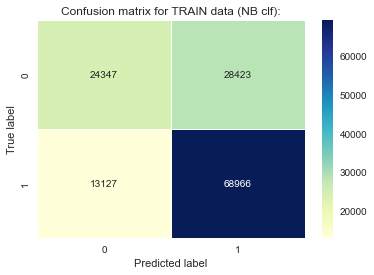

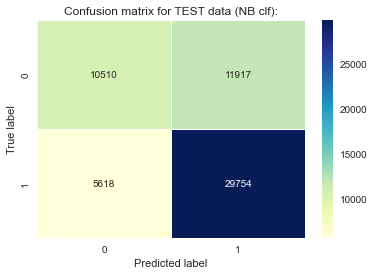

In [50]:
# Evaluate the model with a confusion matrix
## train data
cm = confusion_matrix(y_train, y_pred_train)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TRAIN data (NB clf):');

## test data
cm = confusion_matrix(y_test, y_pred)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TEST data (NB clf):');

## Hyperparameter Tuning

In [ ]:
param_lr = {'penalty':('l1','l2'), 
            'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs', 'sag', ]
               }

grid_lr = GridSearchCV(lr_clf, param_grid=param_lr, cv=5, scoring='f1', 
                           verbose=5, n_jobs=-1)

grid_lr.fit(X_train, y_train)

In [52]:
## CURRENTLY FOR SCORE='F1'

# Show best parameters
print('Best score:\n{:.2f}'.format(grid_lr.best_score_))
print("Best parameters:\n{}".format(grid_lr.best_params_))

# Save best model as best_model
best_log_reg = grid_lr.best_estimator_
print(best_log_reg)

Best score:
0.77
Best parameters:
{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=0.001, max_iter=1000)


In [53]:
# save the pickled model to disk
import pickle

filename = 'logreg_model.sav'
pickle.dump(best_log_reg, open(filename, 'wb'))
print(best_log_reg)

LogisticRegression(C=0.001, max_iter=1000)


Classification report for TEST data: 
               precision    recall  f1-score   support

           0       0.67      0.43      0.52     22427
           1       0.70      0.86      0.78     35372

    accuracy                           0.69     57799
   macro avg       0.68      0.65      0.65     57799
weighted avg       0.69      0.69      0.68     57799

--------------------------------------------------------------------------------


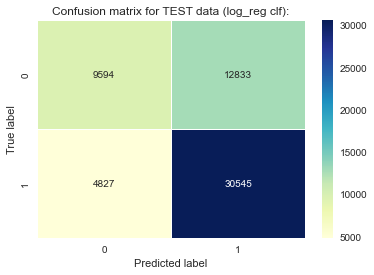

In [54]:
# evaluate test set
y_pred = best_log_reg.predict(X_test)

## classification report
print('Classification report for TEST data: \n {}'.format(classification_report(y_test, y_pred)))
print("--------"*10)

## confusion matrix
cm = confusion_matrix(y_test, y_pred)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TEST data (log_reg clf):');

## ROC-AUC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.721


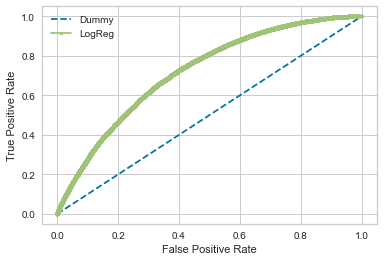

In [55]:
# fit best model to training data
best_log_reg.fit(X_train, y_train)

# predict probabilities
lr_probs = best_log_reg.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# generate a no skill prediction (majority class) (does the same as the dummy classifier)
ns_probs = [1 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogReg')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Precision-Recall Curve

Logistic Regression: f1=0.776 auc=0.775


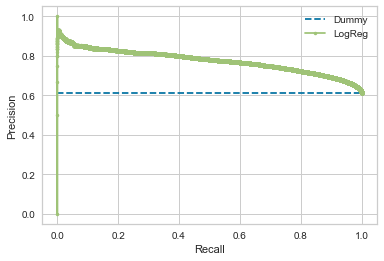

In [56]:
# precision-recall curve and f1

# predict class values
yhat = best_log_reg.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)


# plot the precision-recall curve for the model
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Dummy')
plt.plot(lr_recall, lr_precision, marker='.', label='LogReg')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show();

In [ ]:
## save the model!

#import pickle

#filename = 'logreg_model.sav'
#pickle.dump(best_log_reg, open(filename, 'wb'))

## Error Analysis

In [95]:
# make new dataframe consisting of X_test, y_test, y_pred
# use X_test and y_test from before one-hot encoding!
df_non_cat = pd.read_csv('data/df_preprocessed_log.csv')
df_non_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192662 entries, 0 to 192661
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          192662 non-null  object 
 1   state            192662 non-null  int64  
 2   delta_dead_laun  192662 non-null  float64
 3   category         192662 non-null  object 
 4   launch_day       192662 non-null  int64  
 5   launch_hour      192662 non-null  int64  
 6   name_len         192662 non-null  int64  
 7   blurb_len        192662 non-null  int64  
 8   goal_usd_log     192662 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 13.2+ MB


In [96]:

# split features from target (features: X, target: y)
X = df_non_cat.drop('state', axis=1)
y = df_non_cat['state']
X.head()


,country,delta_dead_laun,category,launch_day,launch_hour,name_len,blurb_len,goal_usd_log
0,US,720.0,games,3,19,23,125,6.907755
1,US,720.0,music,0,7,51,108,9.615805
2,GB,1439.0,games,3,19,34,133,9.479141
3,US,720.0,publishing,0,21,40,121,7.937375
4,US,720.0,music,3,4,31,134,8.160518


In [97]:

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (134863, 8)
y_train: (134863,)
X_test: (57799, 8)
y_test: (57799,)


In [98]:
X_test.head()
X_test_reset = X_test.reset_index()

y_test_reset = y_test.reset_index()

In [99]:
# combine X_test, y_test and y_pred

y_pred_df = pd.DataFrame(y_pred)
y_pred_df['state_pred'] = y_pred_df.loc[:,0]
y_pred_df.drop(0, inplace=True, axis=1)
y_pred_df.info()
y_pred_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57799 entries, 0 to 57798
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   state_pred  57799 non-null  int64
dtypes: int64(1)
memory usage: 451.7 KB


,state_pred
0,1
1,0
2,1
3,1
4,1


In [100]:

df_error = pd.concat([X_test_reset, y_test_reset, y_pred_df], axis=1)
df_error.head()
#df_error.info()


,index,country,delta_dead_laun,category,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,index,state,state_pred
0,9463,US,1342.0,art,1,23,27,124,6.802395,9463,1,1
1,168793,GB,683.0,technology,4,10,27,124,8.288293,168793,0,0
2,118784,GB,720.0,film & video,2,15,7,73,7.582021,118784,1,1
3,70,US,720.0,music,1,16,31,88,8.006368,70,1,1
4,166535,US,720.0,fashion,2,23,45,128,4.605170,166535,1,1


### split into false negatives (state = 1 and state_pred = 0) and false positives (state = 0 and state_pred = 1)

In [101]:
# false positives
FP = df_error.query('state==0 and state_pred==1')
FP.info()
FP.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833 entries, 5 to 57797
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            12833 non-null  int64  
 1   country          12833 non-null  object 
 2   delta_dead_laun  12833 non-null  float64
 3   category         12833 non-null  object 
 4   launch_day       12833 non-null  int64  
 5   launch_hour      12833 non-null  int64  
 6   name_len         12833 non-null  int64  
 7   blurb_len        12833 non-null  int64  
 8   goal_usd_log     12833 non-null  float64
 9   index            12833 non-null  int64  
 10  state            12833 non-null  int64  
 11  state_pred       12833 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1.3+ MB


,index,country,delta_dead_laun,category,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,index,state,state_pred
5,69288,US,720.0,art,2,4,46,98,7.696213,69288,0,1
10,99158,AU,696.0,photography,1,10,30,57,8.575424,99158,0,1
12,101609,AU,480.0,film & video,6,2,34,132,8.861906,101609,0,1
13,46563,IE,740.0,art,3,19,33,98,7.434050,46563,0,1
15,73284,US,720.0,crafts,0,19,27,123,7.600902,73284,0,1


In [102]:
# false negatives
FN = df_error.query('state==1 and state_pred==0')
FN.info()
FN.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4827 entries, 6 to 57796
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            4827 non-null   int64  
 1   country          4827 non-null   object 
 2   delta_dead_laun  4827 non-null   float64
 3   category         4827 non-null   object 
 4   launch_day       4827 non-null   int64  
 5   launch_hour      4827 non-null   int64  
 6   name_len         4827 non-null   int64  
 7   blurb_len        4827 non-null   int64  
 8   goal_usd_log     4827 non-null   float64
 9   index            4827 non-null   int64  
 10  state            4827 non-null   int64  
 11  state_pred       4827 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 490.2+ KB


,index,country,delta_dead_laun,category,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,index,state,state_pred
6,86324,US,801.0,technology,1,18,55,135,11.652687,86324,1,0
14,66472,US,1079.0,publishing,6,20,16,122,10.308953,66472,1,0
20,71282,US,720.0,food,5,19,25,133,10.308953,71282,1,0
91,66643,US,1152.0,film & video,3,21,40,131,10.308953,66643,1,0
128,86837,US,734.0,food,2,9,35,84,8.853665,86837,1,0


In [103]:
# true positives
TP = df_error.query('state==1 and state_pred==1')
TP.info()
TP.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30545 entries, 0 to 57798
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            30545 non-null  int64  
 1   country          30545 non-null  object 
 2   delta_dead_laun  30545 non-null  float64
 3   category         30545 non-null  object 
 4   launch_day       30545 non-null  int64  
 5   launch_hour      30545 non-null  int64  
 6   name_len         30545 non-null  int64  
 7   blurb_len        30545 non-null  int64  
 8   goal_usd_log     30545 non-null  float64
 9   index            30545 non-null  int64  
 10  state            30545 non-null  int64  
 11  state_pred       30545 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 3.0+ MB


,index,country,delta_dead_laun,category,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,index,state,state_pred
0,9463,US,1342.0,art,1,23,27,124,6.802395,9463,1,1
2,118784,GB,720.0,film & video,2,15,7,73,7.582021,118784,1,1
3,70,US,720.0,music,1,16,31,88,8.006368,70,1,1
4,166535,US,720.0,fashion,2,23,45,128,4.605170,166535,1,1
7,100574,US,768.0,fashion,0,18,60,135,9.350102,100574,1,1


In [104]:
# true negatives
TN = df_error.query('state==0 and state_pred==0')
TN.info()
TN.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9594 entries, 1 to 57757
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            9594 non-null   int64  
 1   country          9594 non-null   object 
 2   delta_dead_laun  9594 non-null   float64
 3   category         9594 non-null   object 
 4   launch_day       9594 non-null   int64  
 5   launch_hour      9594 non-null   int64  
 6   name_len         9594 non-null   int64  
 7   blurb_len        9594 non-null   int64  
 8   goal_usd_log     9594 non-null   float64
 9   index            9594 non-null   int64  
 10  state            9594 non-null   int64  
 11  state_pred       9594 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 974.4+ KB


,index,country,delta_dead_laun,category,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,index,state,state_pred
1,168793,GB,683.0,technology,4,10,27,124,8.288293,168793,0,0
8,149052,US,720.0,food,2,0,38,72,9.615805,149052,0,0
26,144058,DE,720.0,food,4,13,53,134,10.206639,144058,0,0
27,40560,US,783.0,technology,0,23,48,124,11.289782,40560,0,0
41,176701,US,720.0,film & video,4,0,10,100,10.819778,176701,0,0


### look at 20 true positives vs false positives

### error-analysis plots

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43378 entries, 5 to 57798
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            43378 non-null  int64  
 1   country          43378 non-null  object 
 2   delta_dead_laun  43378 non-null  float64
 3   category         43378 non-null  object 
 4   launch_day       43378 non-null  int64  
 5   launch_hour      43378 non-null  int64  
 6   name_len         43378 non-null  int64  
 7   blurb_len        43378 non-null  int64  
 8   goal_usd_log     43378 non-null  float64
 9   index            43378 non-null  int64  
 10  state            43378 non-null  int64  
 11  state_pred       43378 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 4.3+ MB


<AxesSubplot:xlabel='category', ylabel='Count'>

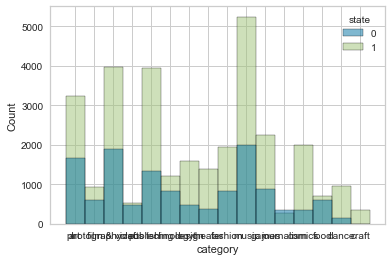

In [105]:
positives = pd.concat([FP,TP], axis=0)
positives.info()
# plot category for false positives and true positives
sns.histplot(x='category', data=positives, hue='state')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14421 entries, 6 to 57757
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            14421 non-null  int64  
 1   country          14421 non-null  object 
 2   delta_dead_laun  14421 non-null  float64
 3   category         14421 non-null  object 
 4   launch_day       14421 non-null  int64  
 5   launch_hour      14421 non-null  int64  
 6   name_len         14421 non-null  int64  
 7   blurb_len        14421 non-null  int64  
 8   goal_usd_log     14421 non-null  float64
 9   index            14421 non-null  int64  
 10  state            14421 non-null  int64  
 11  state_pred       14421 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1.4+ MB


<AxesSubplot:xlabel='category', ylabel='Count'>

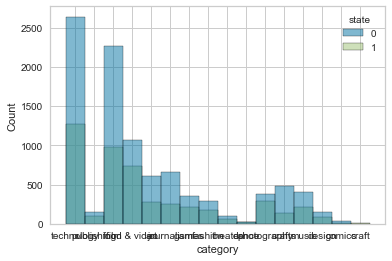

In [106]:
negatives = pd.concat([FN,TN], axis=0)
negatives.info()

# plot category for false negatives and true negatives
sns.histplot(x='category', data=negatives, hue='state')

<AxesSubplot:xlabel='goal_usd_log', ylabel='Count'>

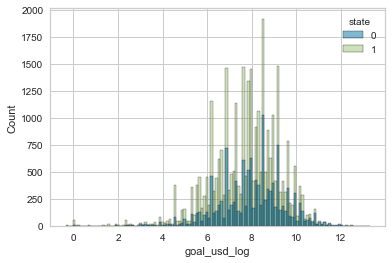

In [108]:
# plot goal in usd for false positives and true positives
sns.histplot(x='goal_usd_log', data=positives, hue='state')

<AxesSubplot:xlabel='goal_usd_log', ylabel='Count'>

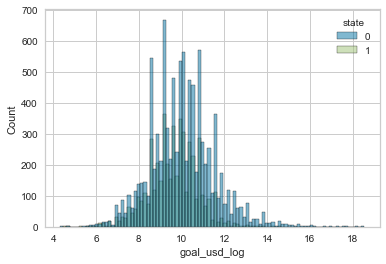

In [109]:
# plot goal in usd for false negatives and true negatives
sns.histplot(x='goal_usd_log', data=negatives, hue='state')

<AxesSubplot:xlabel='delta_dead_laun', ylabel='Count'>

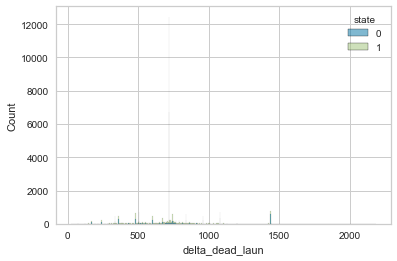

In [110]:
# plot time for false positives and true positives
sns.histplot(x='delta_dead_laun', data=positives, hue='state')

<AxesSubplot:xlabel='delta_dead_laun', ylabel='Count'>

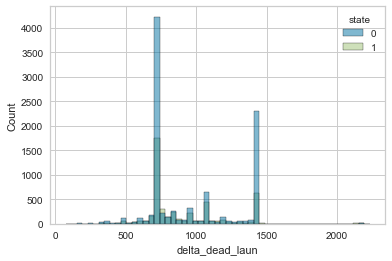

In [111]:
# plot time for false negatives
sns.histplot(x='delta_dead_laun', data=negatives, hue='state')

<AxesSubplot:xlabel='country', ylabel='Count'>

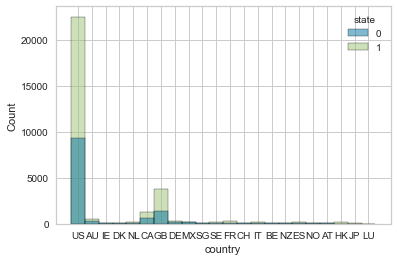

In [112]:
# plot country for false positives and true positives
sns.histplot(x='country', data=positives, hue='state')

<AxesSubplot:xlabel='country', ylabel='Count'>

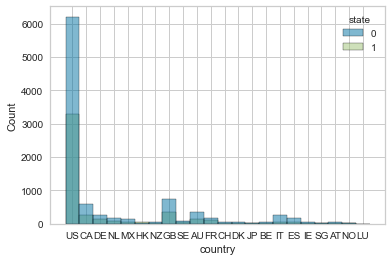

In [113]:
# plot country for false negatives and true negatives
sns.histplot(x='country', data=negatives, hue='state')

<AxesSubplot:xlabel='name_len', ylabel='Count'>

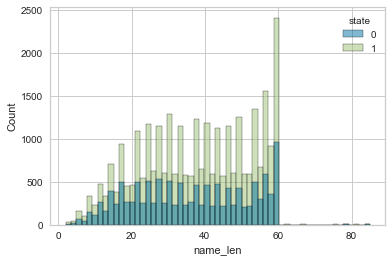

In [114]:
# plot name length for false positives and true positives
sns.histplot(x='name_len', data=positives, hue='state')

<AxesSubplot:xlabel='name_len', ylabel='Count'>

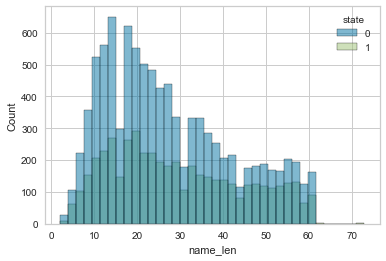

In [115]:
# plot name length for false negatives and true negatives
sns.histplot(x='name_len', data=negatives, hue='state')

<AxesSubplot:xlabel='blurb_len', ylabel='Count'>

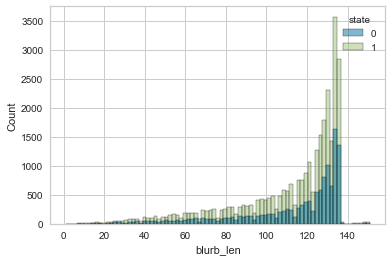

In [116]:
# plot blurb length for false positives and true positives
sns.histplot(x='blurb_len', data=positives, hue='state')

<AxesSubplot:xlabel='blurb_len', ylabel='Count'>

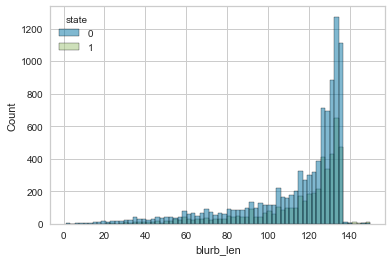

In [117]:
# plot blurb length for false negatives and true negatives
sns.histplot(x='blurb_len', data=negatives, hue='state')

<AxesSubplot:xlabel='launch_day', ylabel='Count'>

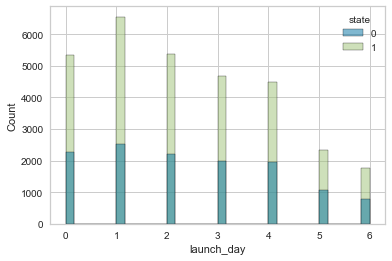

In [118]:
# plot launch day for false positives and true positives
sns.histplot(x='launch_day', data=positives, hue='state')

<AxesSubplot:xlabel='launch_day', ylabel='Count'>

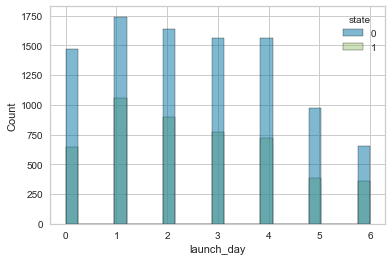

In [119]:
# plot launch day for false negatives and true negatives
sns.histplot(x='launch_day', data=negatives, hue='state')

<AxesSubplot:xlabel='launch_hour', ylabel='Count'>

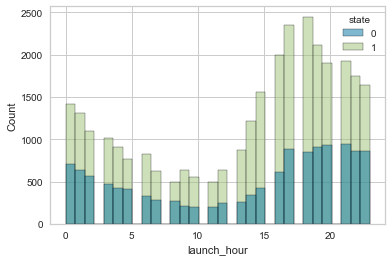

In [120]:
# plot launch day for false positives and true positives
sns.histplot(x='launch_hour', data=positives, hue='state')

<AxesSubplot:xlabel='launch_hour', ylabel='Count'>

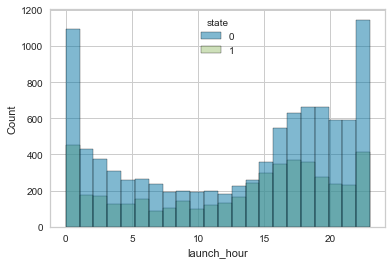

In [121]:
# plot launch day for false negatives and true negatives
sns.histplot(x='launch_hour', data=negatives, hue='state')

In [122]:
# look at random sample of 20 true positives and false positives
print(TP.sample(n=20))
print(FP.sample(n=20))

        index country  delta_dead_laun      category  launch_day  launch_hour  \
22457   91169      US            603.0           art           5           19   
25574  166140      NL           1288.0    publishing           2           20   
10384  136805      US            816.0       fashion           1            8   
3716    65798      US            720.0         dance           5            2   
24304  154007      US            720.0        design           1           18   
15463   66980      US            363.0           art           3            3   
12417  125484      US            720.0    publishing           4           20   
8643    69889      US            720.0        comics           5            2   
54956   90398      US            720.0         music           3           18   
55522   38505      US            720.0         craft           6           22   
29298   37057      GB            746.0    publishing           4           14   
30892   59167      MX       

In [123]:
# look at random sample of 20 true negatives and false negatives
print(TN.sample(n=20))
print(FN.sample(n=20))

        index country  delta_dead_laun      category  launch_day  launch_hour  \
26081  182906      US            719.0       fashion           3           17   
29678   50722      US            720.0    technology           3            8   
15157  147567      NL            635.0           art           1           12   
57413   73192      US           1214.0         music           0           14   
40135   48480      GB            719.0    technology           0           19   
31656  190130      AT           1440.0    technology           1            9   
51740   73161      US            720.0        design           3           23   
7240   168660      US            720.0    technology           1           19   
33645   11045      US            720.0          food           2            5   
16976   25093      US           1079.0    technology           0           22   
31705   57092      US            720.0       fashion           3            2   
53094   97153      US       

### Error analysis using yellowbrick

In [124]:
#from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
#visualizer = ClassPredictionError(
#    best_log_reg(random_state=42), classes=classes)

# Fit the training data to the visualizer
#visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
#visualizer.score(X_test, y_test)

# Draw visualization
#visualizer.show()

## Feature Importance - probably not a great idea with logistic regression

Feature: 0, Score: -0.00080
Feature: 1, Score: -0.04301
Feature: 2, Score: 0.00532
Feature: 3, Score: 0.02099
Feature: 4, Score: -0.00135
Feature: 5, Score: -0.26716
Feature: 6, Score: -0.05299
Feature: 7, Score: -0.01846
Feature: 8, Score: 0.03012
Feature: 9, Score: 0.01104
Feature: 10, Score: -0.06633
Feature: 11, Score: 0.03293
Feature: 12, Score: -0.04170
Feature: 13, Score: 0.05555
Feature: 14, Score: 0.19432
Feature: 15, Score: 0.13258
Feature: 16, Score: 0.00206
Feature: 17, Score: -0.16450
Feature: 18, Score: 0.03914
Feature: 19, Score: 0.01003
Feature: 20, Score: -0.04790
Feature: 21, Score: -0.05889
Feature: 22, Score: -0.00459
Feature: 23, Score: 0.00499
Feature: 24, Score: 0.00728
Feature: 25, Score: 0.05690
Feature: 26, Score: 0.23728
Feature: 27, Score: 0.56313
Feature: 28, Score: 0.24783
Feature: 29, Score: -0.46656
Feature: 30, Score: 0.39404
Feature: 31, Score: 0.22382
Feature: 32, Score: 0.04800
Feature: 33, Score: 0.21528
Feature: 34, Score: -0.54515
Feature: 35, Sco

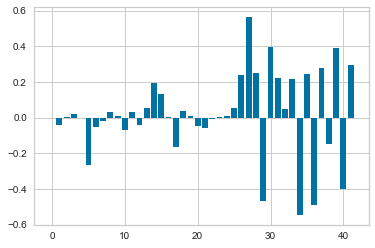

In [125]:
importance = best_log_reg.coef_[0]
for i,v in enumerate(importance):
   print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()